In [2]:
# https://kieranrcampbell.github.io/blog/2016/05/15/gibbs-sampling-bayesian-linear-regression.html

In [3]:
import numpy as np

%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
def sample_beta_0(y, x, beta_1, tau, mu_0, tau_0):
    N = len(y)
    assert len(x) == N
    precision = tau_0 + tau * N
    mean = tau_0 * mu_0 + tau * np.sum(y - beta_1 * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [6]:
def sample_beta_1(y, x, beta_0, tau, mu_1, tau_1):
    N = len(y)
    assert len(x) == N
    precision = tau_1 + tau * np.sum(x * x)
    mean = tau_1 * mu_1 + tau * np.sum( (y - beta_0) * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [7]:
def sample_tau(y, x, beta_0, beta_1, alpha, beta):
    N = len(y)
    alpha_new = alpha + N / 2
    resid = y - beta_0 - beta_1 * x
    beta_new = beta + np.sum(resid * resid) / 2
    return np.random.gamma(alpha_new, 1 / beta_new)

Text(0, 0.5, 'y')

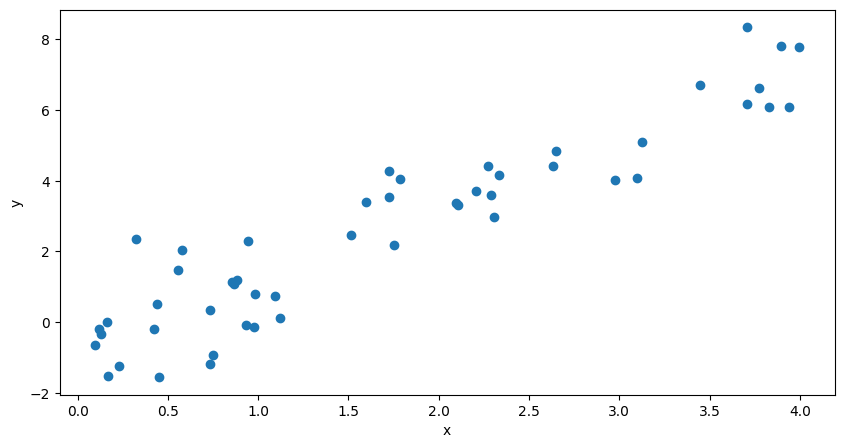

In [8]:
beta_0_true = -1
beta_1_true = 2
tau_true = 1

N = 50
x = np.random.uniform(low = 0, high = 4, size = N)
y = np.random.normal(beta_0_true + beta_1_true * x, 1 / np.sqrt(tau_true))

synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

In [9]:
## specify initial values
init = {"beta_0": 0,
        "beta_1": 0,
        "tau": 2}

## specify hyper parameters
hypers = {"mu_0": 0,
         "tau_0": 1,
         "mu_1": 0,
         "tau_1": 1,
         "alpha": 2,
         "beta": 1}

In [10]:
def gibbs(y, x, iters, init, hypers):
    assert len(y) == len(x)
    beta_0 = init["beta_0"]
    beta_1 = init["beta_1"]
    tau = init["tau"]
    
    trace = np.zeros((iters, 3)) ## trace to store values of beta_0, beta_1, tau
    
    for it in range(iters):
        beta_0 = sample_beta_0(y, x, beta_1, tau, hypers["mu_0"], hypers["tau_0"])
        beta_1 = sample_beta_1(y, x, beta_0, tau, hypers["mu_1"], hypers["tau_1"])
        tau = sample_tau(y, x, beta_0, beta_1, hypers["alpha"], hypers["beta"])
        trace[it,:] = np.array((beta_0, beta_1, tau))
        
    trace = pd.DataFrame(trace)
    trace.columns = ['beta_0', 'beta_1', 'tau']
        
    return trace

In [11]:
iters = 1000
trace = gibbs(y, x, iters, init, hypers)

Text(0, 0.5, 'Parameter value')

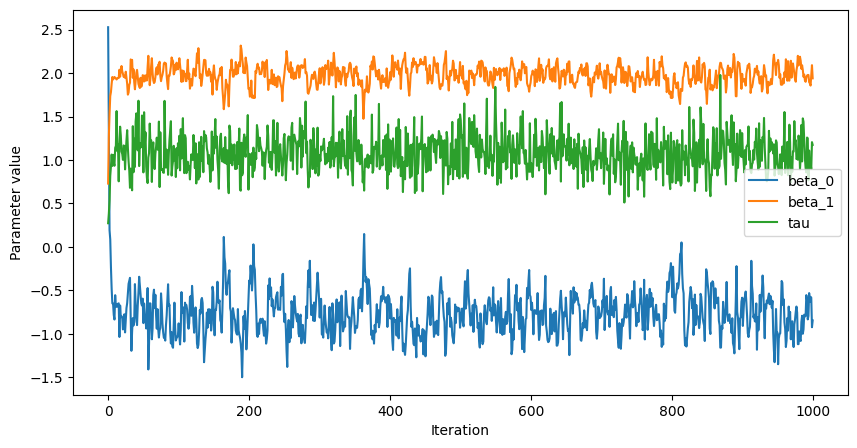

In [12]:
traceplot = trace.plot()
traceplot.set_xlabel("Iteration")
traceplot.set_ylabel("Parameter value")

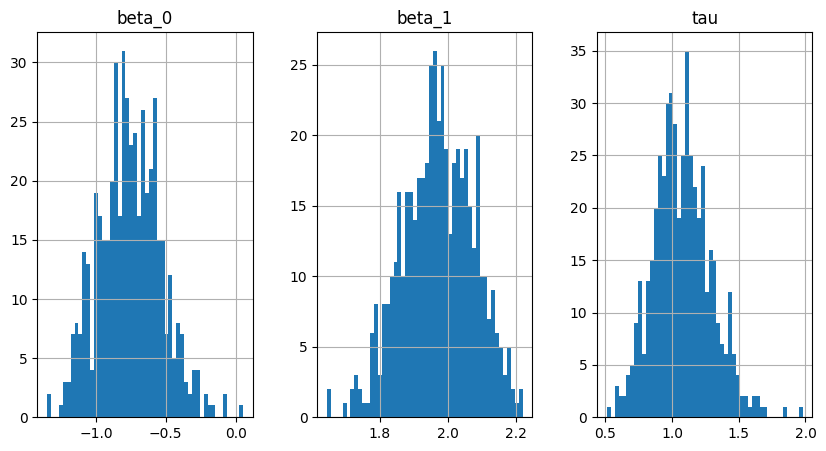

In [53]:
trace_burnt = trace[500:999]
hist_plot = trace_burnt.hist(bins = 50, layout = (1,3))

In [14]:
print(trace_burnt.median())
print(trace_burnt.std())

beta_0   -0.764667
beta_1    1.972740
tau       1.068846
dtype: float64
beta_0    0.222074
beta_1    0.104522
tau       0.215127
dtype: float64


#### Add n trace to make posterior estimation better

In [55]:
NumberOfTrace = 1000
TraceDict = {}
for i in range(NumberOfTrace):
    init = {"beta_0": 0 + np.random.normal(0,1),
        "beta_1": 0+ np.random.normal(0,1),
        "tau": 2+ np.random.normal(0,1)}
    TraceDict[f'Trace_{i}'] = gibbs(y, x, iters, init, hypers)


C:\Users\abyo0503\AppData\Local\Temp\ipykernel_7788\1017716287.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.random.normal(mean, 1 / np.sqrt(precision))
C:\Users\abyo0503\AppData\Local\Temp\ipykernel_7788\1017716287.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.random.normal(mean, 1 / np.sqrt(precision))
C:\Users\abyo0503\AppData\Local\Temp\ipykernel_7788\1017716287.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.random.normal(mean, 1 / np.sqrt(precision))
C:\Users\abyo0503\AppData\Local\Temp\ipykernel_7788\1017716287.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.random.normal(mean, 1 / np.sqrt(precision))
C:\Users\abyo0503\AppData\Local\Temp\ipykernel_7788\1017716287.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.random.normal(mean, 1 / np.sqrt(precision))
C:\Users\abyo0503\AppData\Local\Temp\ipykernel_7788\1017716287.py:7: RuntimeWarning: invalid value encountered in sqrt
  retu

In [56]:
TraceBeta0Df = np.zeros((iters, NumberOfTrace))
for n in zip(TraceDict.keys(),range(NumberOfTrace)):
    TraceBeta0Df[:,n[1]] = TraceDict[n[0]]['beta_0']

Text(0, 0.5, 'Beta_0 value')

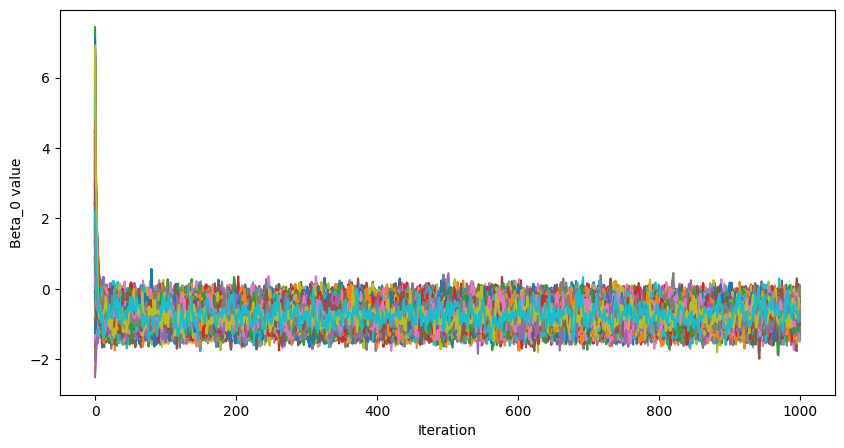

In [57]:
traceplotBeta0 = pd.DataFrame(TraceBeta0Df).plot(legend=False)
traceplotBeta0.set_xlabel("Iteration")
traceplotBeta0.set_ylabel("Beta_0 value")

In [58]:
TraceBeta1Df = np.zeros((iters, NumberOfTrace))
for n in zip(TraceDict.keys(),range(NumberOfTrace)):
    TraceBeta1Df[:,n[1]] = TraceDict[n[0]]['beta_1']

Text(0, 0.5, 'Beta_1 value')

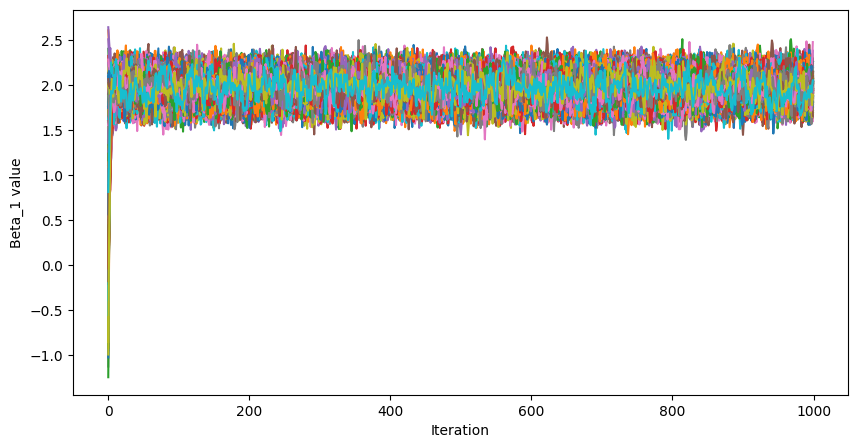

In [59]:
traceplotBeta1 = pd.DataFrame(TraceBeta1Df).plot(legend=False)
traceplotBeta1.set_xlabel("Iteration")
traceplotBeta1.set_ylabel("Beta_1 value")

In [60]:
TraceTauDf = np.zeros((iters, NumberOfTrace))
for n in zip(TraceDict.keys(),range(NumberOfTrace)):
    TraceTauDf[:,n[1]] = TraceDict[n[0]]['tau']

Text(0, 0.5, 'Tau value')

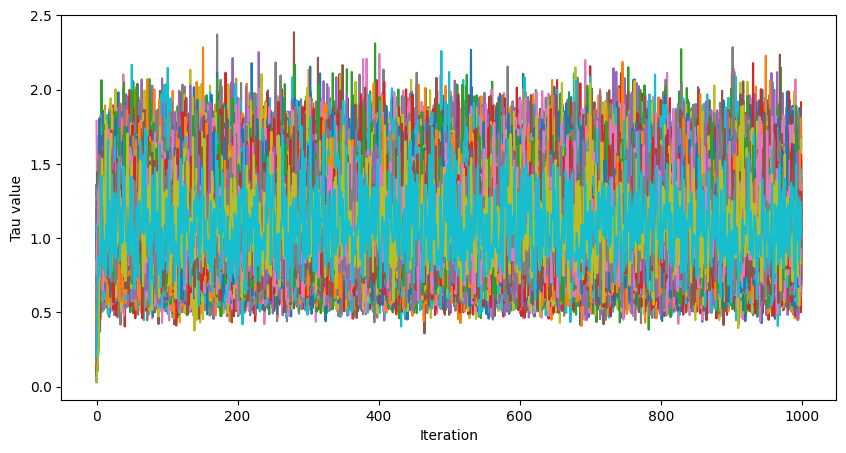

In [61]:
traceplotTau = pd.DataFrame(TraceTauDf).plot(legend=False)
traceplotTau.set_xlabel("Iteration")
traceplotTau.set_ylabel("Tau value")

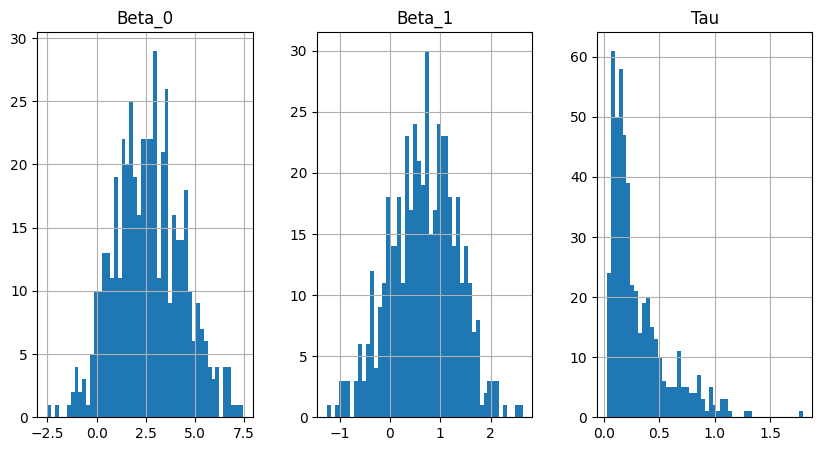

In [62]:
Beta0List = []
Beta1List = []
TauList = []

for i in range(NumberOfTrace):
    Beta0List.extend(TraceBeta0Df[i])
    Beta1List.extend(TraceBeta1Df[i])
    TauList.extend(TraceTauDf[i])
TraceDf = pd.DataFrame({'Beta_0':Beta0List,'Beta_1':Beta1List,'Tau':TauList})
TraceDfBurnt = TraceDf[500:999]
HistPlot = TraceDfBurnt.hist(bins = 50, layout = (1,3))